<a href="https://colab.research.google.com/github/seifah1234/Project/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.  Import Important Libraries 📚
---
* **kagglehub** to load the dataset
* **pandas** for data preprocessing
* **matplotlib** and **seaborn** for data visulaization
* **scikit-learn** for feature engineering and machine learning models



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-failure-prediction


## **2.  Load and Read Data** 🔽
---
* Our data consists of 12 columns
  - 11 features
    - Integers = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR']
    - Float = ['Oldpeak']
    - Object = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
  - 1 Target ('HeartDisease') Yes/No


In [9]:
df_heart_failure = pd.read_csv('/root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1/heart.csv')
print("Data Head: ")
display(df_heart_failure.head())
print("\nData Info:")
display(df_heart_failure.info())
print("Data Describe: ")
display(df_heart_failure.describe())

Data Head: 


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None

Data Describe: 


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## **3. Handle Missing Values** ❗
---

* In our data there is no missing values in it so we don't need to do anything. 🥳

In [10]:
print("Data Null values: \n", df_heart_failure.isna().sum())

Data Null values: 
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## **4. Handle Data Duplicates** 🔁
---
* In our data there is no duplicates so again we don't need to do anything. 🥳 🥳

In [11]:
print("Data Duplicates: \n", df_heart_failure.duplicated().sum())

Data Duplicates: 
 0


## **5. Data Analysis** 📊


* The dataset is relatively balanced, with a slight majority of patients having heart disease (1). This balance makes it suitable for classification.

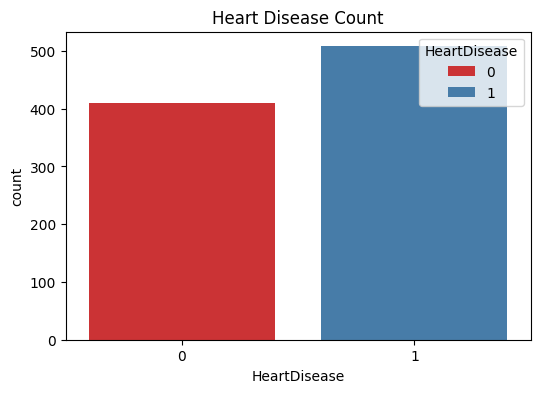

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="HeartDisease", hue="HeartDisease", data=df_heart_failure, palette="Set1")
plt.title("Heart Disease Count")
plt.show()

* Age is spread from 25 to ~80. Distribution peaks between 50-60 years. Patients with heart disease tend to be older, confirming age as a major risk factor.

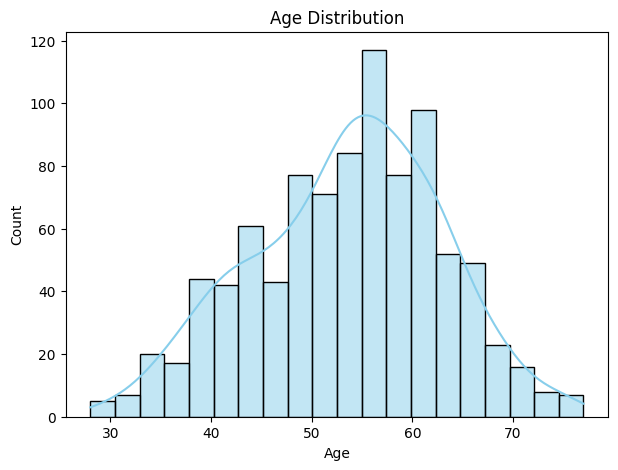

In [13]:
plt.figure(figsize=(7,5))
sns.histplot(df_heart_failure["Age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

/tmp/ipython-input-3707049060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y="Age", data=df_heart_failure, palette="Set3")


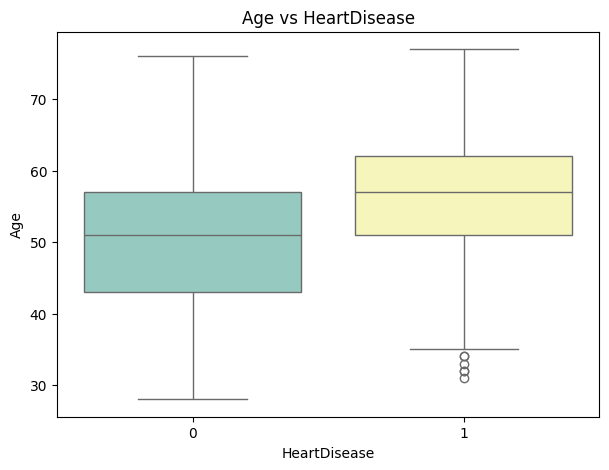

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(x='HeartDisease', y="Age", data=df_heart_failure, palette="Set3")
plt.title("Age vs HeartDisease")
plt.show()

* RestingBP ranges mostly between 110–150. No strong separation between diseased vs healthy, but very high values may indicate risk.

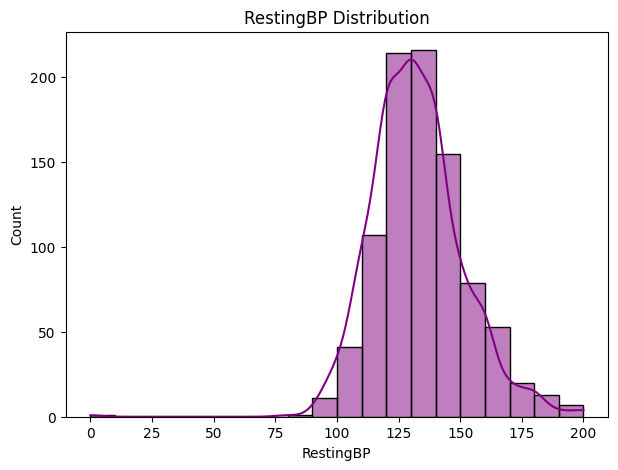

In [15]:
plt.figure(figsize=(7,5))
sns.histplot(df_heart_failure["RestingBP"], bins=20, kde=True, color="purple")
plt.title("RestingBP Distribution")
plt.show()

/tmp/ipython-input-4282869553.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HeartDisease", y="RestingBP", data=df_heart_failure, palette="Set3")


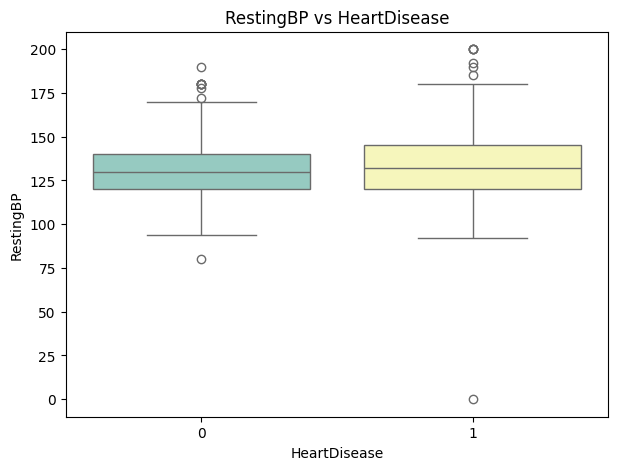

In [16]:
plt.figure(figsize=(7,5))
sns.boxplot(x="HeartDisease", y="RestingBP", data=df_heart_failure, palette="Set3")
plt.title("RestingBP vs HeartDisease")
plt.show()

* Cholesterol has many values near 0 (possibly missing encoded as 0). For valid values, higher cholesterol appears more in patients with heart disease.

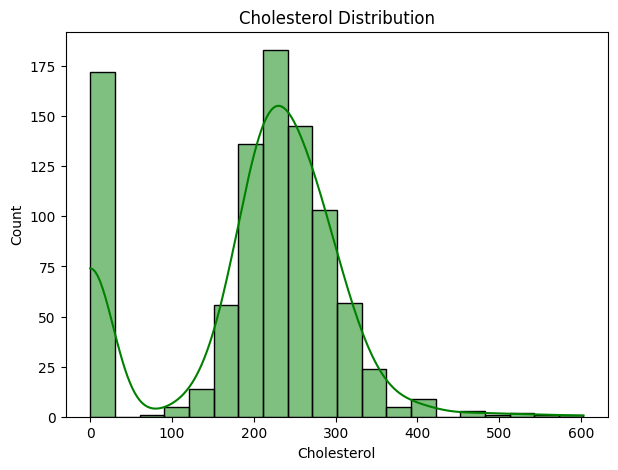

In [17]:
plt.figure(figsize=(7,5))
sns.histplot(df_heart_failure["Cholesterol"], bins=20, kde=True, color="green")
plt.title("Cholesterol Distribution")
plt.show()

/tmp/ipython-input-3354636929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cholesterol",data=df_heart_failure, palette="Set2")


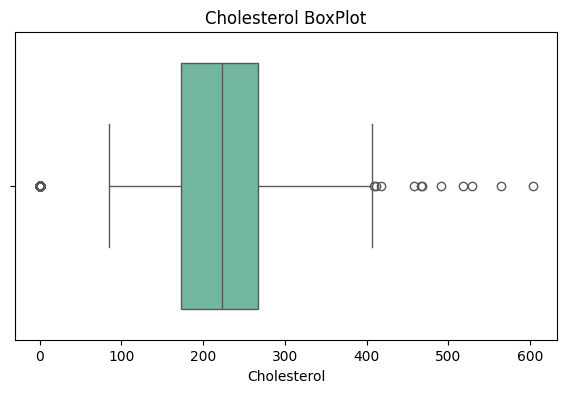

In [18]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Cholesterol",data=df_heart_failure, palette="Set2")
plt.title("Cholesterol BoxPlot")
plt.show()

* Fasting blood sugar > 120mg/dl (FastingBS=1) is more frequent among patients with heart disease. Still, most patients are FastingBS=0.

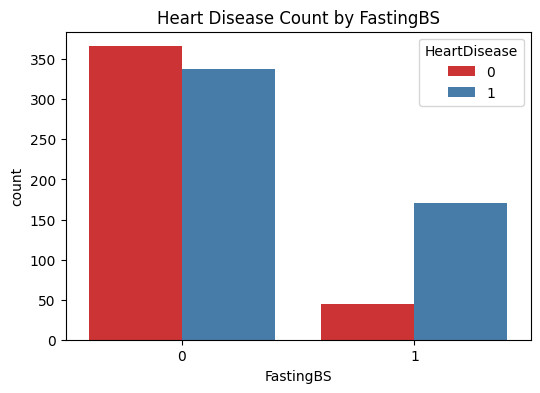

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x="FastingBS", hue="HeartDisease", data=df_heart_failure, palette="Set1")
plt.title("Heart Disease Count by FastingBS")
plt.show()

* Patients with abnormal RestingECG tend to have more heart disease compared to Normal readings.

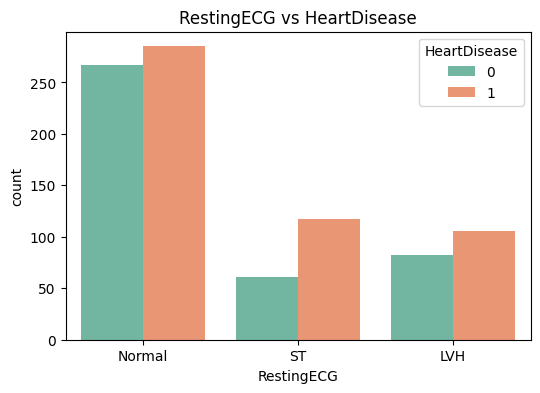

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x="RestingECG", hue="HeartDisease", data=df_heart_failure, palette="Set2")
plt.title("RestingECG vs HeartDisease")
plt.show()

* MaxHR is usually between 90–200. Patients with heart disease often have lower MaxHR, indicating reduced exercise capacity.

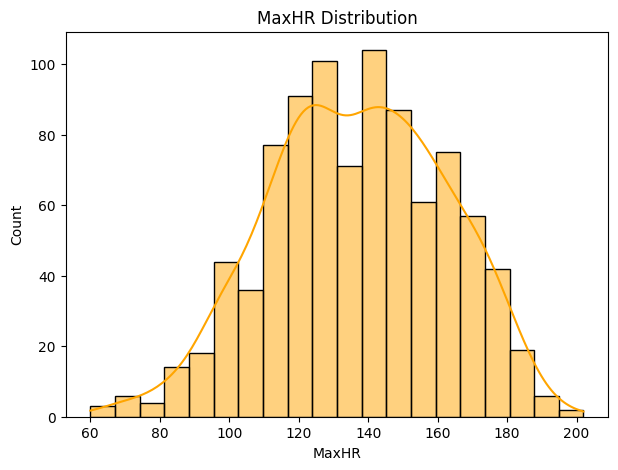

In [21]:
plt.figure(figsize=(7,5))
sns.histplot(df_heart_failure["MaxHR"], bins=20, kde=True, color="orange")
plt.title("MaxHR Distribution")
plt.show()

/tmp/ipython-input-51282113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HeartDisease", y="MaxHR", data=df_heart_failure, palette="Set3")


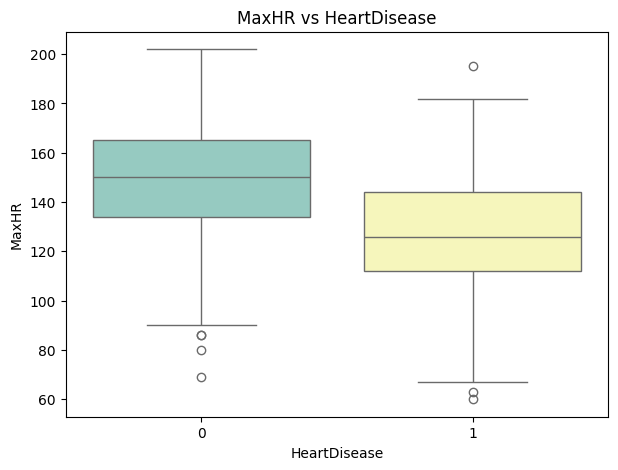

In [22]:
plt.figure(figsize=(7,5))
sns.boxplot(x="HeartDisease", y="MaxHR", data=df_heart_failure, palette="Set3")
plt.title("MaxHR vs HeartDisease")
plt.show()

* Exercise-induced angina (Y) is strongly associated with heart disease, while most patients without angina (N) are healthier.

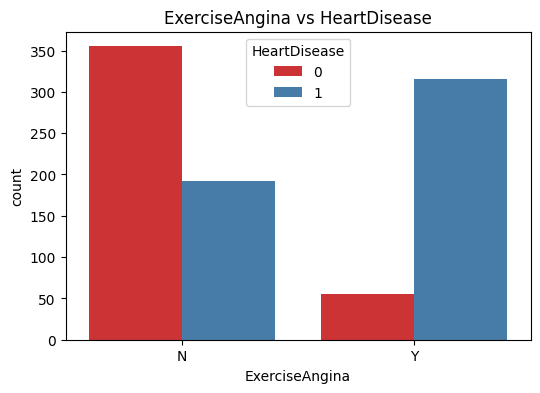

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x="ExerciseAngina", hue="HeartDisease", data=df_heart_failure, palette="Set1")
plt.title("ExerciseAngina vs HeartDisease")
plt.show()

* Higher Oldpeak values (depression induced by exercise) are associated with heart disease. Healthy patients usually have values near 0.

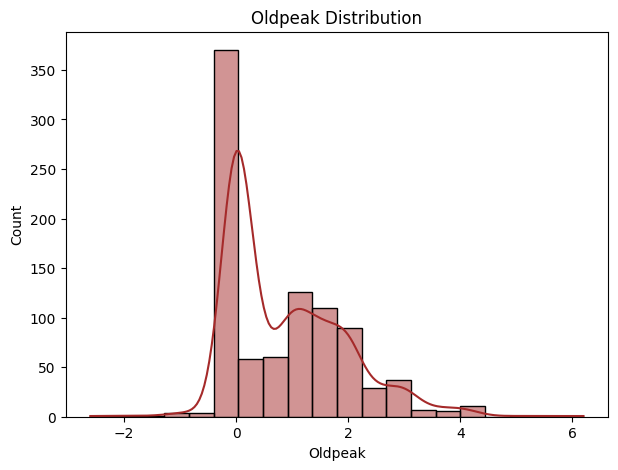

In [24]:
plt.figure(figsize=(7,5))
sns.histplot(df_heart_failure["Oldpeak"], bins=20, kde=True, color="brown")
plt.title("Oldpeak Distribution")
plt.show()

/tmp/ipython-input-3200650696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HeartDisease", y="Oldpeak", data=df_heart_failure, palette="Set2")


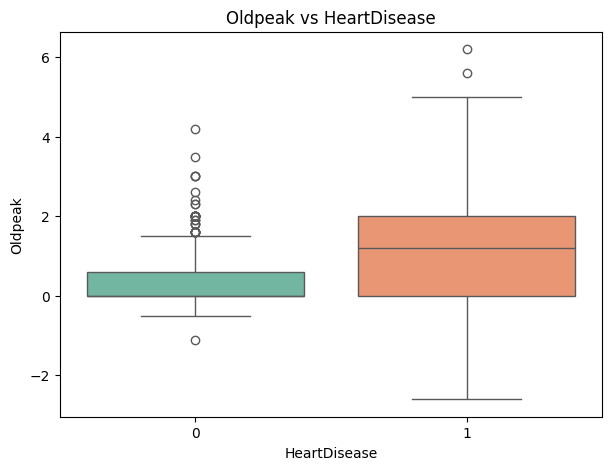

In [25]:
plt.figure(figsize=(7,5))
sns.boxplot(x="HeartDisease", y="Oldpeak", data=df_heart_failure, palette="Set2")
plt.title("Oldpeak vs HeartDisease")
plt.show()

* More males (M) than females (F) in dataset. Heart disease is more common among males, although females also show significant cases.

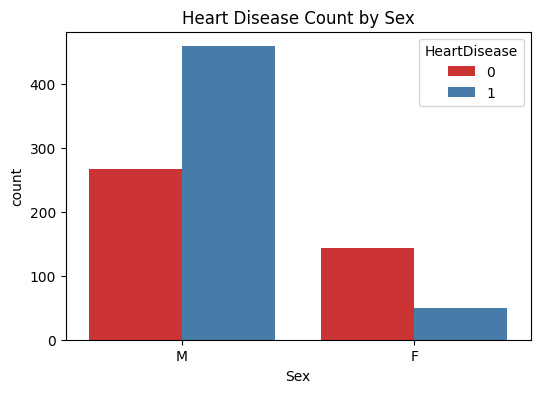

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="HeartDisease", data=df_heart_failure, palette="Set1")
plt.title("Heart Disease Count by Sex")
plt.show()

* Chest pain type strongly correlates with heart disease. Asymptomatic (ASY) patients are mostly heart disease positive, while ATA/NAP have fewer cases.

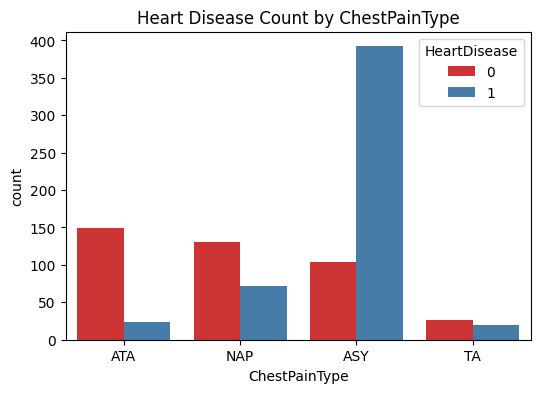

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x="ChestPainType", hue="HeartDisease", data=df_heart_failure, palette="Set1")
plt.title("Heart Disease Count by ChestPainType")
plt.show()

* Down-sloping ST segment (Flat or Down) is highly related to heart disease, while 'Up' slope is more common in healthy patients.

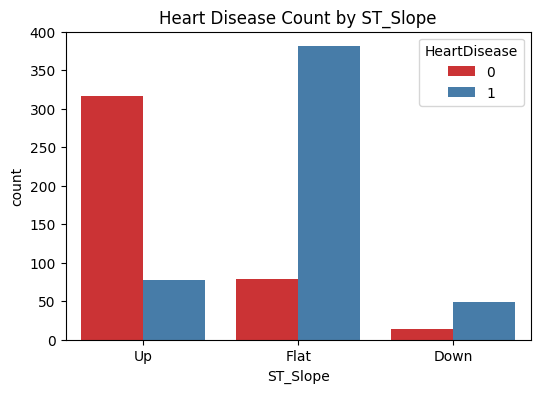

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x="ST_Slope", hue="HeartDisease", data=df_heart_failure, palette="Set1")
plt.title("Heart Disease Count by ST_Slope")
plt.show()

## 6. Categorical Features Encoding 💻

In [29]:
encoder = LabelEncoder()

df_heart_failure["Sex"] = encoder.fit_transform(df_heart_failure["Sex"])
df_heart_failure["ChestPainType"] = encoder.fit_transform(df_heart_failure["ChestPainType"])
df_heart_failure["RestingECG"] = encoder.fit_transform(df_heart_failure["RestingECG"])
df_heart_failure["ExerciseAngina"] = encoder.fit_transform(df_heart_failure["ExerciseAngina"])
df_heart_failure["ST_Slope"] = encoder.fit_transform(df_heart_failure["ST_Slope"])

## 7. Normalize Numerical Features 🔔

In [30]:
scaler = MinMaxScaler()

df_heart_failure[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]] = scaler.fit_transform(df_heart_failure[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]])

## 8. Handle Unmeaning Values ❓

In [31]:
df_heart_failure[df_heart_failure["Cholesterol"] == 0]["Cholesterol"] = df_heart_failure["Cholesterol"].median()
df_heart_failure[df_heart_failure["RestingBP"] == 0]["RestingBP"] = df_heart_failure["RestingBP"].median()


/tmp/ipython-input-3351858258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart_failure[df_heart_failure["Cholesterol"] == 0]["Cholesterol"] = df_heart_failure["Cholesterol"].median()
/tmp/ipython-input-3351858258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart_failure[df_heart_failure["RestingBP"] == 0]["RestingBP"] = df_heart_failure["RestingBP"].median()


## 9. Correlation Heatmap 🔲

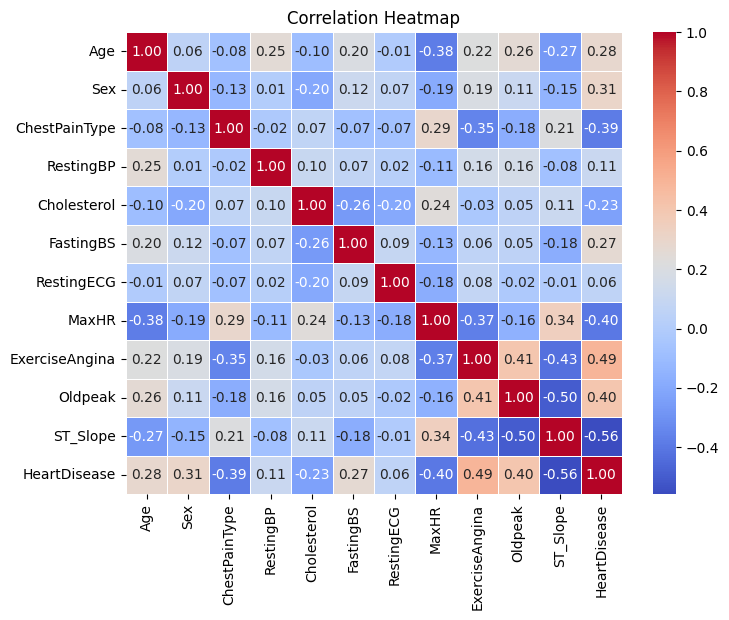

In [32]:
matrix = df_heart_failure.corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## 10. Drop unneccessary features ❌

In [33]:
df_heart_failure.drop(["RestingECG"], axis=1, inplace=True)

## 11. Split Data to Train and Test ✂

In [34]:
X = df_heart_failure.drop(["HeartDisease"], axis=1)
y = df_heart_failure["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1st: KNN Model

## 1. Train the model

In [35]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 2. Calculate the Accuracy

In [36]:
y_pred = KNN_model.predict(X_test)

print("KNN Model Accuracy = ", accuracy_score(y_test, y_pred)*100)

KNN Model Accuracy =  84.23913043478261


# 2nd: Logistic Regression Model

## 1. Train the model

In [37]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

LogisticRegression()

## 2. Calculate the Accuracy

In [38]:
y_pred = logistic_model.predict(X_test)

print("Logistic Model Accuracy = ", accuracy_score(y_test, y_pred)*100)

Logistic Model Accuracy =  84.78260869565217


# 3rd: Decision Tree Model

## 1. Train the model

In [39]:
tree_model = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, max_depth=5)

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

## 2. Calculate Accuracu

In [40]:
y_pred = tree_model.predict(X_test)
print("Decision Tree Model Accuracy = ", accuracy_score(y_test, y_pred)*100)

Decision Tree Model Accuracy =  86.41304347826086


# 4th: Randon Forest Model

## 1. Train the model

In [41]:
random_model = RandomForestClassifier(n_estimators=50, min_samples_leaf=2, min_samples_split=10, max_depth=5)

random_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)

## 2. Calculate Accuracy

In [42]:
y_pred = random_model.predict(X_test)

print("Random Forest Model Accuracy = ", accuracy_score(y_test, y_pred)*100)

Random Forest Model Accuracy =  87.5
